<img src = "https://github.com/DrStephenLynch/webpages/blob/main/Solutions_Section_2.png?raw=true" alt = "My Image" >

Copyright CRC Press 2023 - present <a href="https://www.routledge.com/Python-for-Scientific-Computing-and-Artificial-Intelligence/Lynch/p/book/9781032258713#"> CRC Press </a> 

Author: Dr Stephen Lynch <a href="https://www.advance-he.ac.uk/ntfs/dr-stephen-lynch">National Teaching Fellow</a> FIMA SFHEA

<a href="https://www.mmu.ac.uk/computing-and-maths/staff/profile/dr-stephen-lynch">Stephen Lynch Homepage</a> 

# Chapter 6: Biology

Question 6.1: This is a one-dimensional discrete system:

$$c_{n+1}=f(c_n)=(1-a)c_n+bc_n^re^{-sc_n},$$

where $c_n$ is blood cell count.

Fixed points of period one satisfy the equation: $c_{n+1}=c_n=c$, say.

In this case, solve the equation $f(c)-c=0$, to determine the $c^*$ fixed points.

Suppose that there is a fixed point at $c=c^*$. Then, fixed points are stable if: 

$$\left| \frac{df(c^*)}{dc} \right|<1.$$

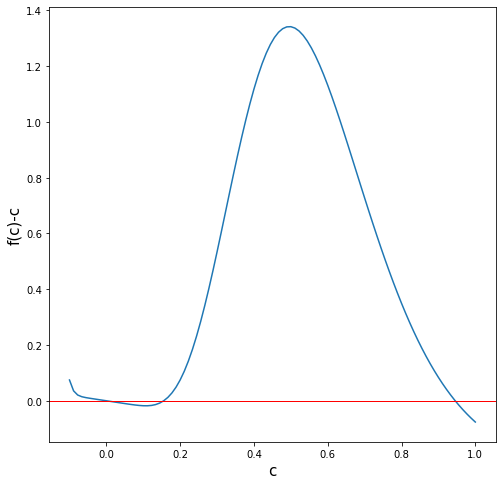

Three fixed points at, c1= 0 c2= 0.155345314963557 c3= 0.945496383877335
df_c1= 0.800000000000000 Stable
df_c2= 1.90289499211662 Unstable
df_c3= 0.625588428407471 Stable


In [1]:
# 6.1: Blood cell population model.
# Determining fixed points of a 1D discrete map and their stability.
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
a , b , r , s = 0.2 , 1.1 * 10**6 , 8 , 16
# Fixed points of period 1, c_{n+1} = c_n = c, say.
c = np.linspace(-0.1 , 1 , 100)
# Plot c against f(c)-c.
plt.plot(c , b * c**r *np.exp(-s * c) - a * c)
plt.axhline(y=0, color="r" , linestyle="-" , linewidth = 1)
plt.xlabel("c", fontsize=15)
plt.ylabel("f(c)-c", fontsize=15)
plt.show()
c = symbols("c")
# Solve the equations numerically in a given range.
# You can see the three fixed points in the figure below.
c1 = nsolve(b * c**r * exp(-s * c) - a * c , c , (0 , 1))
c2 = nsolve(b * c**r * exp(-s * c) - a * c , c , (0.1 , 0.2))
c3 = nsolve(b * c**r * exp(-s * c) - a * c , c , (0.5 , 1))
print("Three fixed points at, c1=",c1 , "c2=", c2 , "c3=", c3)
f = (1 - a) * c + b * c**r * exp(-s * c)
df = diff(f , c)
# Fixed point is stable if |df_c*| < 1.
print("df_c1=" , abs(df.subs(c , c1)) , "Stable")
print("df_c2=" , abs(df.subs(c , c2)) , "Unstable")
print("df_c3=" , abs(df.subs(c , c3)) , "Stable")
# Use similar arguments when a = 0.3.

In [2]:
# 6.2: Determine the critical points and their stability using eigenvalues.
# Critical points: Solve dx/dt=dy/dt=0.
# There are three critical points in the first quadrant.
# Discard the point at (0,-1) as you can't have negative populations.
from sympy import *
x , y = symbols("x y")
solve([x * (4 - y - x) , y * (3 * x - 1 - y)])

[{x: 0, y: -1}, {x: 0, y: 0}, {x: 5/4, y: 11/4}, {x: 4, y: 0}]

Label the critical points: $O=(0,0)$, $A=(4,0)$ and $B=(\frac{5}{4},\frac{11}{4})$.

In [3]:
# 6.2: Compute the eigenvalues using the Jacobian matrix.
P , Q = x * (4 - y - x) , y * (3 * x - 1 - y)
J = Matrix([[diff(P , x) , diff(P , y)],[diff(Q , x) , diff(Q , y)]])
JO = J.subs([(x , 0) , (y , 0)])
eigJO = JO.eigenvals()
print("eigJO =" , eigJO)
JA = J.subs([(x , 4) , (y , 0)])
eigJA = JA.eigenvals()
print("eigJA = ", eigJA)
JB = J.subs([(x , 5 / 4) , (y , 11 / 4)])
eigJB = JB.eigenvals()
print("eigJB = ", eigJB)

eigJO = {4: 1, -1: 1}
eigJA =  {11: 1, -4: 1}
eigJB =  {-2.0 - 3.1224989991992*I: 1, -2.0 + 3.1224989991992*I: 1}


The eigenvalues are:

For critical point O: $\lambda_1=4$, $\lambda_2=-1$, and the critical point is unstable, since one eigenvalue is positive.

For critical point A: $\lambda_1=11$, $\lambda_2=-4$, and the critical point is unstable, since one eigenvalue is positive.

For critical point B: $\lambda_1=-2-3.1225i$, $\lambda_2=-2+3.1225i$, and the critical point is stable, as both eigenvalues have negative real part.

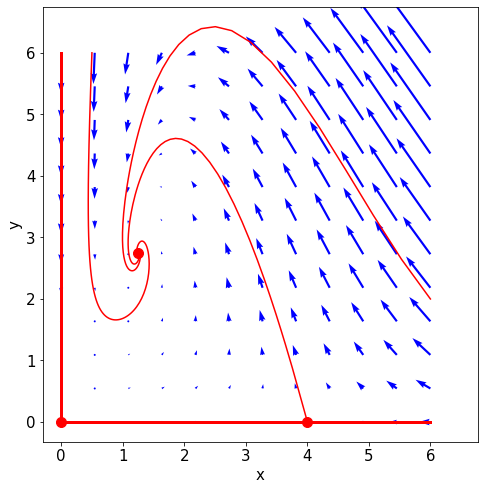

In [4]:
# 6.2: Phase portrait of a predator-prey system.
# The populations stabilize to constant values - the species co-exist.
# Note that the axes will be scaled by large numbers.
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
plt.figure(figsize=(8, 8))
import pylab as pl
# The two-dimensional system.
def dx_dt(x, t):
    return [x[0]*(4-x[1]-x[0]), x[1]*(3*x[0]-1-x[1])]
# Use 1000 points to get smooth trajectories.
ts = np.linspace(0, 20, 1000)
xs = odeint(dx_dt, [4,0.01], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-')
xs = odeint(dx_dt, [0.5,6], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-')
xs = odeint(dx_dt, [0.01,0], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-',linewidth=3)
xs = odeint(dx_dt, [6,2], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-')
xs = odeint(dx_dt, [0,6], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-',linewidth=3)
xs = odeint(dx_dt, [6,0], ts)
plt.plot(xs[:, 0], xs[:, 1], 'r-',linewidth=3)
# Label the axes and set fontsizes.
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.tick_params(labelsize=15)
# Plot the vectorfield.
X, Y = np.mgrid[0:6:12j, 0:6:12j]
u = X*(4-X-Y)
v = Y*(3*X-1-Y)
# Plot a vector field with blue arrows.
pl.quiver(X, Y, u, v, color='b')
# Show the critical points in the phase portrait (red dots).
plt.plot([0], [0], marker="o", markersize=10,markeredgecolor="red", markerfacecolor="red")
plt.plot([4], [0], marker="o", markersize=10,markeredgecolor="red", markerfacecolor="red")
plt.plot([5 / 4], [11 / 4], marker="o", markersize=10,markeredgecolor="red", markerfacecolor="red")
plt.axis("square")
plt.show()

Phase portrait of a predator-prey system. The axes would be scaled by large numbers in applications and the species would co-exist with scaled populations of $x=\frac{5}{4}$ and $y=\frac{11}{4}$, assuming of course that neither of the populations are zero.

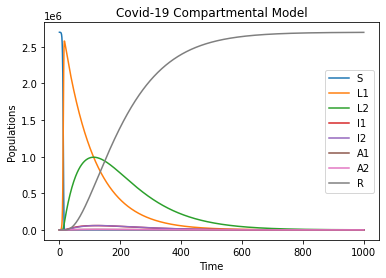

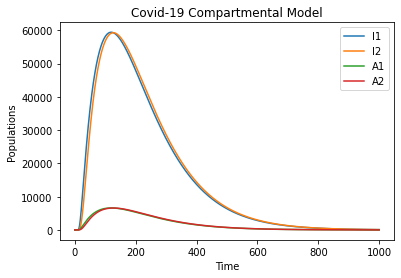

A1 max= 6604
I1 max= 59440


In [5]:
# 6.3: Compartmental model of Covid-19 in Manchester.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import floor
beta , eta , xi ,ppi , eps , gamma = 10**(-4) , 0.2 , 0.1 , 0.1 ,0.01 , 0.15
S0,L10,L20,I10,I20,A10,A20,R0  = 2700000,0,0,1,0,0,0,0
# Maximum time point and total number of time points
tmax , n  = 1000 , 1000
def Covid(X, t, beta , eta , xi ,ppi , eps , gamma):
#The Differential Equations
    S,L1,L2,I1,I2,A1,A2,R = X
    dS = -beta*S*(I1+I2+xi*(A1+A2)+eta*L2)
    dL1 = beta*S*(I1+I2+xi*(A1+A2)+eta*L2)-eps*L1
    dL2 = eps*(L1-L2)
    dI1 = (1-ppi)*eps*L2-gamma*I1
    dI2 = gamma*(I1-I2)
    dA1 = ppi*eps*L2-gamma*A1
    dA2 = gamma*(A1-A2)
    dR = gamma*(I2+A2)
    return (dS,dL1,dL2,dI1,dI2,dA1,dA2,dR)
# Integrate differential equations on the time grid t.
t = np.linspace(0, tmax, n)
odesol = odeint(Covid, (S0,L10,L20,I10,I20,A10,A20,R0), t, \
           args=(beta , eta , xi ,ppi , eps , gamma))
S,L1,L2,I1,I2,A1,A2,R = odesol.T
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("Covid-19 Compartmental Model")
plt.plot(t, S, label="S")
plt.plot(t, L1, label="L1")
plt.plot(t, L2, label="L2")
plt.plot(t, I1, label="I1")
plt.plot(t, I2, label="I2")
plt.plot(t, A1, label="A1")
plt.plot(t, A2, label="A2")
plt.plot(t, R, label="R")
legend = plt.legend(loc='best')
plt.show() 
# Plot graph of smaller population numbers.
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("Covid-19 Compartmental Model")
plt.plot(t, I1, label="I1")
plt.plot(t, I2, label="I2")
plt.plot(t, A1, label="A1")
plt.plot(t, A2, label="A2")
legend = plt.legend(loc='best')
plt.show() 
print("A1 max=",floor(max(A1)))
print("I1 max=",floor(max(I1)))

<Figure size 432x288 with 0 Axes>

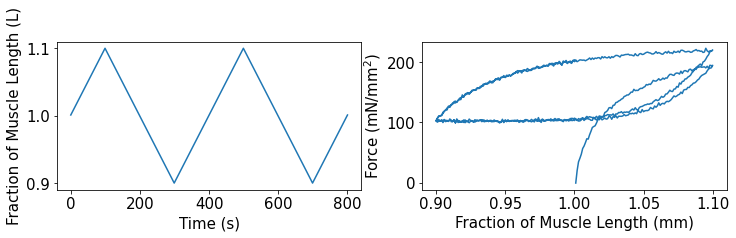

In [ ]:
# 6.4: Single fiber muscle model without holding.
import numpy as np
import matplotlib.pyplot as plt
Length , a , b = 800 , 380*0.098 , 0.325
F0 = a / 0.257         # Initial force.
vm , alpha , LSE0 , k = F0*b/a , F0/0.1 , 0.3 , a/25
t = [0+0.01*i for i in range(801)]      # Time.
A = [1.001+0.001*i for i in range(100)]
B = [1.099-0.001*i for i in range(100)]
D = [0.999-0.001*i for i in range(100)]
E = [0.901+0.001*i for i in range(100)]
G = [1.001+0.001*i for i in range(100)]
H = [1.099-0.001*i for i in range(100)]
J = [0.999-0.001*i for i in range(100)]
K = [0.901+0.001*i for i in range(101)]
L = A+B+D+E+G+H+J+K         
plt.figure()
plt.subplots(figsize=(12, 6))
plt.subplot(221)
plt.plot(L)
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Fraction of Muscle Length (L)', fontsize=15)
plt.tick_params(labelsize=15)
LSE=np.zeros(800).tolist();
LCE=np.zeros(800).tolist();
# F is force and L represents length.
# Solve Hill's ordinary differential equations using Euler's method.
F=np.zeros(801).tolist(); 
for i in range(800):
    LSE[i] = 0.3+F[i]/alpha;
    LCE[i] = L[i]-LSE[i];
    dt=t[i+1]-t[i];
    dL=L[i+1]-L[i];
    dF=alpha*((dL/dt)+b*((F0-F[i])/(a+F[i])))*dt;
    F[i+1]=F[i]+dF;
F=np.array(F)
FF=(F0/100)*np.random.randn(801)
F=F+FF
F=F.tolist()
plt.subplot(222)
plt.plot(L,F)
plt.xlabel("Fraction of Muscle Length (mm)", fontsize=15)
plt.ylabel("Force (mN/mm$^2)$", fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

# Chapter 7: Chemistry

In [ ]:
# 7.1: Balancing chemical-reaction equations.
from sympy import *
# Construct the augmented matrix.
ACCM=Matrix([[1,0,3,0,0],\
          [1,8,5,2,0],\
          [1,6,6,0,1],\
          [3,7,7,1,2],\
          [0,0,0,0,1]])
print(ACCM)
invACCM=ACCM.inv() # Find the inverse matrix.
print(invACCM)
Nullv=invACCM.col(4) / min(abs(invACCM.col(4)))
print(Nullv) # Scaled null-space vector.
# Na=sodium, H=hydrogen, C=carbon, and O=oxygen.

Matrix([[1, 0, 3, 0, 0], [1, 8, 5, 2, 0], [1, 6, 6, 0, 1], [3, 7, 7, 1, 2], [0, 0, 0, 0, 1]])
Matrix([[-1/3, -1/3, -1/3, 2/3, -1], [-7/18, -1/18, 1/9, 1/9, -1/3], [4/9, 1/9, 1/9, -2/9, 1/3], [11/18, 11/18, -5/9, -2/9, 1], [0, 0, 0, 0, 1]])
Matrix([[-3], [-1], [1], [3], [3]])


Thus, the balanced chemical reaction equation is:

$$3 \mathrm{NaHCO}_3+\mathrm{H}_3\mathrm{C}_6\mathrm{H}_5\mathrm{O}_7 \rightleftharpoons \mathrm{Na}_3\mathrm{C}_6\mathrm{H}_5\mathrm{O}_7+3\mathrm{H}_2\mathrm{O}+3\mathrm{C}\mathrm{O}_2.$$

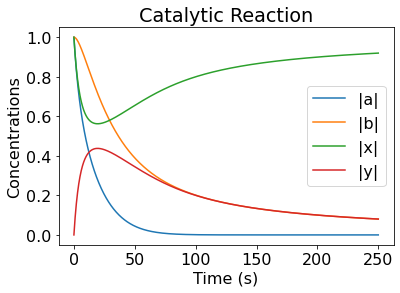

In [ ]:
# 7.2: A catalytic reaction.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
# Set the parameters.
k1 , k2 = 0.1, 0.05
a0, b0, x0 , y0 = 1, 1, 1, 0
tmax, n = 250, 1000
def Catalytic(X, t, k1 , k2):
    a, b, x, y = X
    da = -k1 * a * x
    db = -k2 * b * y
    dx = -k1 * a * x +k2 * b * y
    dy = k1 * a * x - k2 * b * y
    return(da, db, dx , dy)
t = np.linspace(0, tmax, n)
odesol = odeint(Catalytic, (a0, b0, x0 , y0), t, args = (k1, k2))
a , b , x , y = odesol.T
plt.xlabel("Time (s)")
plt.ylabel("Concentrations")
plt.title("Catalytic Reaction")
plt.plot(t, a, label = "|a|")
plt.plot(t, b, label = "|b|")
plt.plot(t, x, label = "|x|")
plt.plot(t, y, label = "|y|")
legend = plt.legend(loc = 'best')
plt.show()

In [ ]:
# 7.3: Chapman cycle of ozone production.
# This is a stiff system of ODEs. 
# There are large (concentrations) and small (rates) parameters involved.
import numpy as np
from scipy.integrate import odeint 
# Set the parameters.
k1 , k2 , k3 , k4  = 3e-12,1.22e-33,5.5e-4,6.86e-16
x0 , y0 , z0 , M = 4e16 , 2e16 , 2e16 , 9e17
tmax, n = 1e8, 10001
# Let x=|O|, y=|O2|, z=|O3|.
def Chapman(X, t, k1 , k2 , k3 , k4 , M):
    x , y , z = X
    dx = 2*k1*y+k3*z-k2*x*y*M-k4*x*z
    dy = k3*z+2*k4*x*z-k1*y-k2*x*y*M
    dz = k2*x*y*M-k3*z-k4*x*z
    return(dx, dy, dz)
t = np.linspace(0, tmax, n)
odesol = odeint(Chapman, (x0 , y0 , z0), t, args = (k1, k2, k3, k4 , M))
x , y , z = odesol.T
print("|O|=", x[10000], "molec/cm cubed")
print("|O2|=", y[10000], "molec/cm cubed")
print("|O3|=", z[10000], "molec/cm cubed")

|O|= 46805158.11585307 molec/cm cubed
|O2|= 6.999019071196589e+16 molec/cm cubed
|O3|= 6539509754323.823 molec/cm cubed


At a KCl concentration of 0.1 AgCl solubility is 3.24E-06


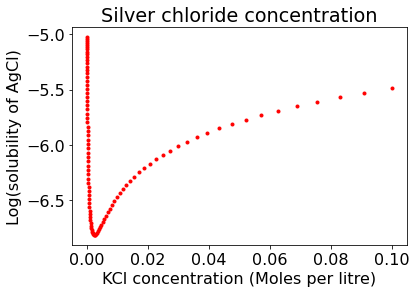

In [ ]:
# 7.4: Common ion effect in solubility.
# Silver chloride in a potassium chloride solution.
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
initAg , initAgCl2, initCl , initK , datapts = 0 ,0 , 0.1 , 0.1 , 100
logxrange = np.logspace(-5 , -1 , num = datapts)
initparams = (initAg, initAgCl2, initCl, initK)
def AgCl_sol2(concentrations):
    (Ag_conc2, AgCl2_conc2, Cl_conc2, K_conc2) = concentrations
    firstEq = Ag_conc2 * Cl_conc2 - 1.82E-10
    secondEq = AgCl2_conc2 - Ag_conc2 * Cl_conc2 ** 2 * 1.78E5
    thirdEq = Ag_conc2 + K_conc2 - Cl_conc2 - AgCl2_conc2
    fourthEq = K_conc2 - K_conc2
    return[firstEq, secondEq, thirdEq, fourthEq]
solution = opt.fsolve(AgCl_sol2,initparams)
solubility = "{:.2E}".format(solution[0] + solution[1])
print("At a KCl concentration of", initK, "AgCl solubility is", solubility)
datapts=100
guess_array2 = tuple(zip(np.zeros(datapts),np.zeros(datapts),logxrange,logxrange))
out_array2 = []
silver_conc2 = []
silverchloride_conc2 = []
chloride_conc2 = []
potassium_conc2 = []
for num in range(0,datapts):
    out_array2.append(list(opt.fsolve(AgCl_sol2,guess_array2[num])))
    silver_conc2.append(out_array2[num][0])
    silverchloride_conc2.append(out_array2[num][1])    
    chloride_conc2.append(out_array2[num][2])
    potassium_conc2.append(out_array2[num][3])
total_solubility = np.add(silver_conc2, silverchloride_conc2)
plt.plot(potassium_conc2,np.log10(total_solubility),'r.')
plt.title("Silver chloride concentration")
plt.xlabel('KCl concentration (Moles per litre)')
plt.ylabel('Log(solubility of AgCl)')
plt.show()

# Chapter 8: Data Science

In [ ]:
# 8.1: Create a DataFrame, Membership Satisfaction at a Gym.
import numpy as np
import pandas as pd
# pd.set_option('display.colheader_justify', 'center')
df=pd.DataFrame({
    "Date": pd.date_range("20220109", periods=7),
    "Day " : pd.Categorical(["Sunday","Monday","Tuesday","Wednesday",
                             "Thursday","Friday","Saturday"]),
    "Member Numbers" : pd.Series([126,34,42,100,54,41,105],
                    dtype="int32"),
    "Staff Numbers" : pd.Series([12,6,6,12,6,6,12],
                    dtype="int32"),
    "Member/Staff Ratio" : pd.Series([10.5,5.7,7.0,8.3,9.0,6.8,8.8],dtype="float32"),
    "Satisfaction (%)" : pd.Series([34,58,74,54,85,88,45],dtype="float32")
    })
df = df.set_index("Date")
df

,Day,Member Numbers,Staff Numbers,Member/Staff Ratio,Satisfaction (%)
Date,,,,,
2022-01-09,Sunday,126,12,10.5,34.0
2022-01-10,Monday,34,6,5.7,58.0
2022-01-11,Tuesday,42,6,7.0,74.0
2022-01-12,Wednesday,100,12,8.3,54.0
2022-01-13,Thursday,54,6,9.0,85.0
2022-01-14,Friday,41,6,6.8,88.0
2022-01-15,Saturday,105,12,8.8,45.0


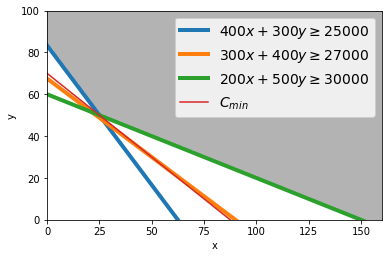

In [ ]:
# 8.2 (a): Feasibility region for Example 8.2.2.
# Minimize C = 20000x+25000y.
# Given 400x+300y>=25000, 300x+400y>=27000,200x+500y>=30000.
# x,y >= 0.
import numpy as np
import matplotlib.pyplot as plt
m = np.linspace(0,200,200)
x , y = np.meshgrid(m , m)
plt.imshow( ((x>=0) & (y>=0) & (400*x+300*y>=25000) & (300*x+400*y>=27000) & (200*x+500*y>=30000)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
# Plot the constraint lines.
x = np.linspace(0, 200, 200)
y1 = (-400*x+25000) / 300
y2 = (-300*x+27000) / 400
y3 = (-200*x+30000) / 500
plt.rcParams["font.size"] = "14"
plt.plot(x, y1, label=r"$400x+300y \geq 25000$" , linewidth = 4)
plt.plot(x, y2, label=r"$300x+400y \geq 27000$" ,  linewidth = 4)
plt.plot(x, y3, label=r"$200x+500y \geq 30000$" , linewidth = 4)
plt.plot(x , (-20000 * x + 1750000) / 25000 , label = r"$C_{min}$")
plt.xlim(0,160)
plt.ylim(0,100)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 8.2(b): Simplex Method problem.
# References are given in the book for the Simplex Method.
from scipy.optimize import linprog
obj = [-20, -10, -15]     # Minimize -z = -20*x1 - 10*x2 - 15*x3.
                          # Maximize z = 20*x1 + 10*x2 + 15*x3.
lhs_ineq = [[ 3,  2, 5],  # 3*x1 + 2*x2 +5*x3.
            [ 2, 1, 1],   # 2*x1+x2+x3.
            [ 1, 1, 3],   # x1+x2+3*x3
          [ 5, 2, 4]]     # 5*x1+2*x2+4*x3.

rhs_ineq = [55 , 26 , 30 , 57]
# Bounds of x1 , x2 , x3.
bnd = [(0, float("inf")), (0, float("inf")) , (0, float("inf"))]  
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,
      method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -268.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.00000000e+00, -3.55271368e-15,  2.60000000e+00,  0.00000000e+00])
  status: 0
 success: True
       x: array([ 1.8, 20.8,  1.6])

The optimal solution is, $z=268$, with $\left(x_1,x_2,x_3 \right)=1.8,20.8,1.6$.

57026/57026 [==============================] - 0s 0us/step


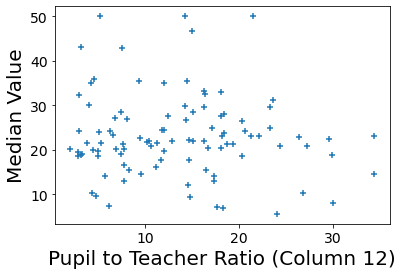

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


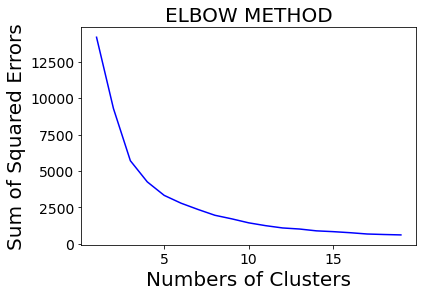

In [ ]:
# 8.3: K-Means Clustering, Column 12 (Pupil to Teacher Ratio).
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fs = 20

from keras.datasets import boston_housing
(x_train, y_train) = boston_housing.load_data(path='boston_housing.npz',test_split=0.2,seed=113)
num_houses , datacol = 100 , 12
plt.scatter(x_train[0][:,datacol][1:num_houses],y_train[1][1:num_houses],marker="+")
plt.xlabel("Pupil to Teacher Ratio (Column 12)",fontsize = fs)
plt.ylabel("Median Value",fontsize = fs)

plt.show()
X  = np.vstack((x_train[0][:,datacol][1:num_houses] , y_train[1][1:num_houses])).T
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
  kmeans.fit(X)
  elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.title('ELBOW METHOD',fontsize = fs)
plt.xlabel("Numbers of Clusters",fontsize = fs)
plt.ylabel("Sum of Squared Errors",fontsize = fs)
plt.show()

number of estimated clusters : 3


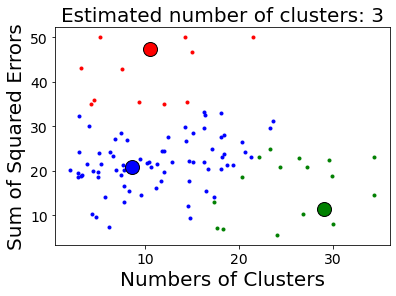

In [ ]:
# Program_8f.py: Mean Shift Clustering Algorithm.
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# The following bandwidth can be automatically detected using
X  = np.vstack((x_train[0][:,datacol][1:num_houses] , y_train[1][1:num_houses])).T
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
fs = 20
plt.title("Estimated number of clusters: %d" % n_clusters_,fontsize=fs)
plt.xlabel("Numbers of Clusters",fontsize = fs)
plt.ylabel("Sum of Squared Errors",fontsize = fs)
plt.show()

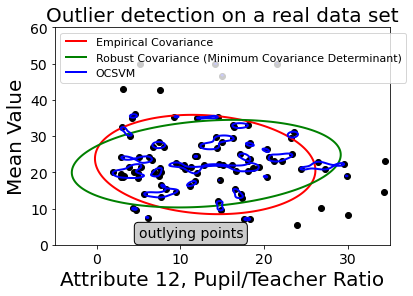

In [ ]:
# 8.3: Outlier detection.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM    # OCSVM: One-Class Support Vector Machine.
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["r", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = np.vstack((x_train[0][:,datacol][1:num_houses] , y_train[1][1:num_houses])).T

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-5, 35, 500), np.linspace(0, 60, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  
plt.title("Outlier detection on a real data set (Boston Housing)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(5, 2),
    xycoords="data",
    textcoords="data",
    xytext=(5, 2),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
fs = 20
plt.title("Outlier detection on a real data set", fontsize=fs)
plt.xlabel("Attribute 12, Pupil/Teacher Ratio",fontsize = fs)
plt.ylabel("Mean Value",fontsize = fs)
plt.show()

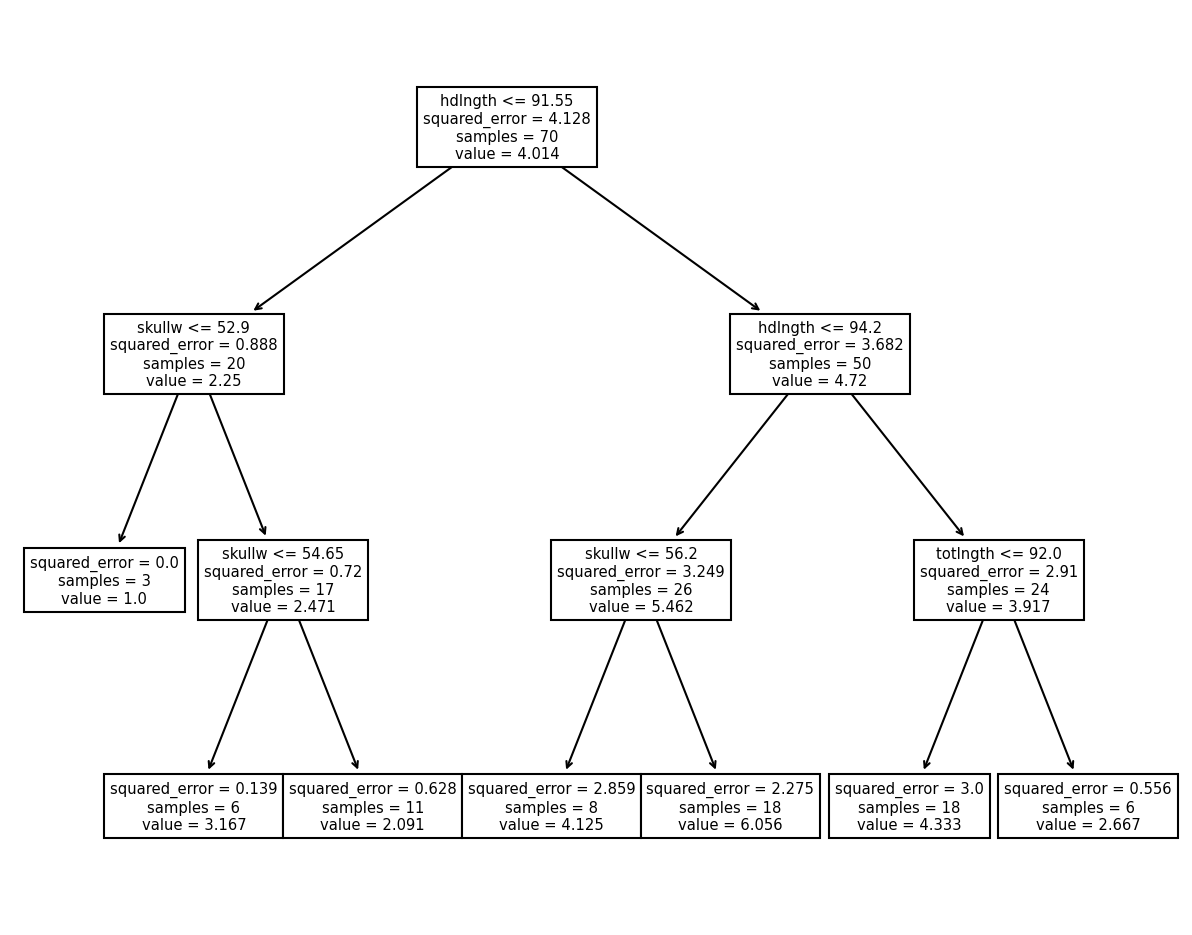

In [7]:
# 8.4: Regression decision tree for possum data.
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv("possum.csv")
df = df.dropna()
X = df.drop(["case", "site", "Pop", "sex", "age","taill","footlgth","earconch","eye","chest","belly"], axis=1)
y = df["age"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
# Create training and testing data.
model = DecisionTreeRegressor(max_depth = 3,random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns)
plt.show()


# Chapter 9: Economics

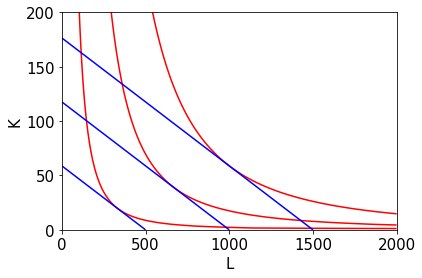

In [ ]:
# 9.1: Cobb-Douglas Model of Production.
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
L,K,lam=symbols('L K lam')
Lmax , Kmax  = 2000 , 200 
w , r = 20 , 170
Y = 200*L**(2/3)*K**(1/3)
C=10000
Lagrange=Y-lam*(w*L+r*K-C)
L1 = diff(Lagrange,L)
L2 = diff(Lagrange,K)
L3 = w*L+r*K-C
sol=solve([L1,L2,L3],L,K,lam)
Y1 = 200*sol[0][0]**(2/3)*sol[0][1]**(1/3)
C=20000
Lagrange=Y-lam*(w*L+r*K-C)
L1 = diff(Lagrange,L)
L2 = diff(Lagrange,K)
L3 = w*L+r*K-C
sol=solve([L1,L2,L3],L,K,lam)
Y2 = 200*sol[0][0]**(2/3)*sol[0][1]**(1/3)
C=30000
Lagrange=Y-lam*(w*L+r*K-C)
L1 = diff(Lagrange,L)
L2 = diff(Lagrange,K)
L3 = w*L+r*K-C
sol=solve([L1,L2,L3],L,K,lam)
Y3 = 200*sol[0][0]**(2/3)*sol[0][1]**(1/3)

Llist = np.linspace(0,Lmax, 1000)
Klist = np.linspace(0, Kmax, 120)
L, K = np.meshgrid(Llist, Klist)
plt.figure()
Z = 200*L**(2/3)*K**(1/3)
plt.contour(L,K,Z,[Y1,Y2,Y3],colors='red')
Z = 20*L+170*K
plt.contour(L,K,Z,[10000,20000,30000],colors='blue')
plt.xlabel('L',fontsize=15)
plt.ylabel('K',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
# 9.2: Solow-Swan model of economic growth.
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

Tmax , Ylim = 100 , 10
def f(alpha , delta , g , n ):
    def Solow_Swan(k,t):
      # dkdt = 0.3+0.2*(1-np.exp(-0.1*t)) * k**alpha - (n + delta + g) * k
      dkdt = 0.3+0.2*np.sin(t)* k**alpha - (n + delta + g) * k
      return dkdt
    k0 = 1
    t = np.linspace(0,Tmax)
    y = odeint(Solow_Swan,k0,t)
    plt.ylim((0,Ylim))
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('k(t)')
    plt.show()
interactive_plot=interactive(f,alpha=(0,1,0.1),delta = (0,1,0.1), \
                               g = (0,0.1,0.01), n = (0,0.1,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), FloatSlider(value=0.0, description…

[*********************100%***********************]  3 of 3 completed


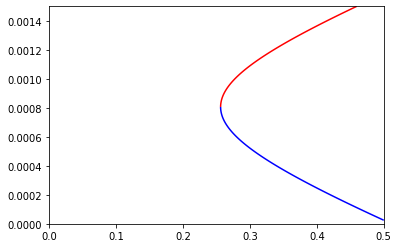

In [ ]:
# 9.3: Modern Portfolio Theory. Plotting the efficient frontier.
# See Figure 8.3.
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
df=yf.download(['AAPL','CAT','GOOG'],start="2000-12-01",end="2020-12-01")
df=np.log(1+df['Adj Close'].pct_change()) # Normalized Portfolio Returnsdf.drop('Date', axis=1, inplace=True)#
df.to_csv('Portfolio_Data.csv')
def PR(weights): # Portfolio Return
  return np.dot(df.mean(),weights)
def PSTD(weights): # Portfolio STD
  return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250) 
  # Annualize STD, 250 trading days.
def RW(df): # Random Weights
  rand=np.random.random(len(df.columns))
  rand /= rand.sum()
  return rand
returns , stds , w = [] ,[] ,[]
for i in range(500):   # Why 500?
  weights=RW(df)
  returns.append(PR(weights))
  stds.append(PSTD(weights))
  w.append(weights)
a , h =min(stds) , returns[stds.index(min(stds))]
xx , yy = 0.290869 , 0.00105605
b=np.sqrt((a**2*(yy-h)**2)/(xx**2-a**2))
xlist = np.linspace(0,0.5, 1000)
y1list = np.linspace(h, 0.0015, 120)
x, y1 = np.meshgrid(xlist, y1list)
y2list = np.linspace(0, h, 120)
x, y2 = np.meshgrid(xlist, y2list)
plt.figure()
Z = x**2/a**2-(y1-h)**2/b**2
plt.contour(x,y1,Z,[1],colors='red')
Z = x**2/a**2-(y2-h)**2/b**2
plt.contour(x,y2,Z,[1],colors='blue')
plt.show()

In [ ]:
# 9.4: Black-Scholes Equation. Check the results of Program_8d.py.
!pip install py_vollib_vectorized
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta,gamma,vega,theta,rho
r , S , K , T , sigma  = 0.01 , 30 , 40, 240/365 , 0.3
print('BlackScholes',bs('c',S,K,T,r,sigma))
print('delta',delta(type,S,K,T,r,sigma))
print('gamma',gamma(type,S,K,T,r,sigma))
print('vega',vega(type,S,K,T,r,sigma))
print('theta',theta('c',S,K,T,r,sigma))
print('rho',rho('p',S,K,T,r,sigma))

     |████████████████████████████████| 130 kB 7.1 MB/s 
  Created wheel for py-vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62855 sha256=541e9353c4806fdad42ee111b9bddd2dd2dad9f2c14dd06674c6ae5872ef0437
  Stored in directory: /root/.cache/pip/wheels/2d/25/50/bc80b93c9a827ed9bef9d86f85365e1934bcbc0666b9f00c11
  Created wheel for py-lets-be-rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24468 sha256=504d7b4b15fa456fdd32fe8d4f2993f48668dfcb05e0ca26a36bfc81eb5af74a
  Stored in directory: /root/.cache/pip/wheels/1a/70/10/bf54a16badc528594c9510ef517badb765a29b651ea5652898
Successfully built py-vollib py-lets-be-rational
BlackScholes 0.5132843798399411
delta 0.15058613984880015
gamma 0.03203161102008452
vega 0.05686707929045143
theta -0.003663899299916886
rho -0.23496032413932816


# Chapter 10: Engineering

i(t)= (5*sqrt(7)*sin(sqrt(7)*t/2)/14 - 5*cos(sqrt(7)*t/2)/2)*exp(-t/2) + 5*exp(-t)/2


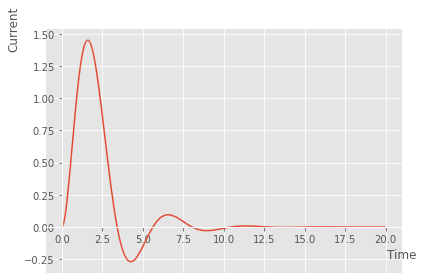

In [ ]:
# 10.1: Linear electrical circuit.
from sympy import *
from matplotlib import style
t=symbols('t')
i=symbols('i',cls=Function) 
deqn1=Eq(i(t).diff(t,t) + i(t).diff(t) + 2*i(t), 5*exp(-t))
odesol1 = dsolve(deqn1, i(t),ics={i(0): 0, diff(i(t), t).subs(t,0): 0})
print('i(t)=',odesol1.rhs)
style.use('ggplot')
plot(odesol1.rhs , (t , 0 , 20),xlabel="Time",ylabel="Current")

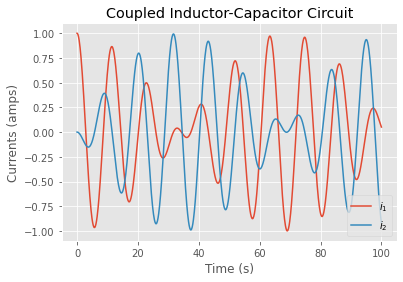

In [ ]:
# 10.2: Two coupled inductor-capacitor circuits.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
# Set the parameters.
alpha , omega = 0.2 , 0.5
x10, y10, x20 , y20 = 1, 0, 0, 0
tmax, n = 100, 1000
# Let x1=i1 and x2=i2.
def Coupled_LC(X, t, alpha , omega):
    x1, y1, x2, y2 = X
    dx1 = y1
    dy1 = -omega**2*((1+alpha)*x1+alpha*x2)
    dx2 = y2
    dy2 = -omega**2*((1+alpha)*x2+alpha*x1)
    return(dx1, dy1, dx2 , dy2)
t = np.linspace(0, tmax, n)
odesol = odeint(Coupled_LC, (x10, y10, x20 , y20), t, args = (alpha, omega))
x1 , y1 , x2 , y2 = odesol.T
plt.xlabel("Time (s)")
plt.ylabel("Currents (amps)")
plt.title("Coupled Inductor-Capacitor Circuit")
plt.plot(t, x1, label = "$i_1$")
plt.plot(t, x2, label = "$i_2$")
legend = plt.legend(loc = 'best')
plt.show()

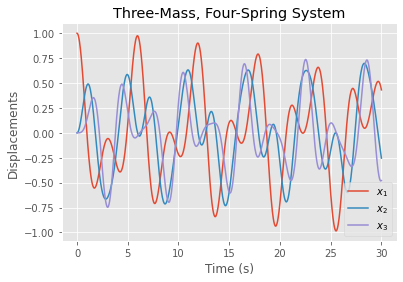

In [ ]:
# 10.3: Three-Mass, Four-Spring System.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
# Set the parameters.
k1 , k2 , k3 , k4  = 1 , 2 , 3 , 4
m1 , m2 , m3 = 1 , 1 , 1
x10, y10, x20 , y20 , x30 , y30 = 1 , 0 , 0 , 0 , 0 , 0
tmax, n = 30, 1000
# For mass m1: x1 is displacement, dx1 is velocity, dy1 is acceleration.
def Mass_Spring(X, t, k1 , k2 , k3 , k4):
    x1 , y1 , x2 , y2 , x3 , y3 = X
    dx1 = y1
    dy1 = (-k1*x1+k2*(x2-x1))/m1
    dx2 = y2
    dy2 = (-k2*(x2-x1)+k3*(x3-x2))/m2
    dx3 = y3
    dy3 = (-k3*(x3-x2)-k4*x3)/m3
    return(dx1 , dy1 , dx2 , dy2 , dx3 , dy3)
t = np.linspace(0, tmax, n)
odesol = odeint(Mass_Spring, (x10,y10,x20,y20,x30,y30), \
                t, args = (k1,k2,k3,k4))
x1 , y1 , x2 , y2 , x3 , y3 = odesol.T
plt.xlabel("Time (s)")
plt.ylabel("Displacements")
plt.title("Three-Mass, Four-Spring System")
plt.plot(t, x1, label = "$x_1$")
plt.plot(t, x2, label = "$x_2$")
plt.plot(t, x3, label = "$x_3$")
legend = plt.legend(loc = 'best')
plt.show()

Exercise 10.4: The Double Pendulum.

![Image in a markdown cell](https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg)

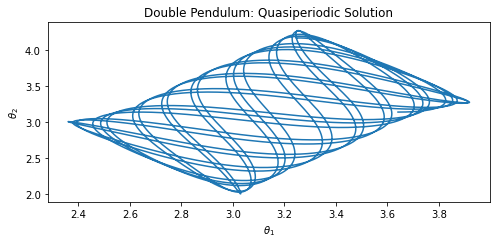

In [41]:
# 10.4: A Double Pendulum.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from math import fmod
# Set the parameters.
# When L1=1.5 and L2=1.5, the system is quasiperiodic  - not sensitive to initial conditions
g , m1 , m2 , L1 , L2 = 9.8 , 1 , 1 , 1.5 , 1.5
# When L1=6 and L2=1, the system is chaotic - sensitive to initial conditions. 
# g , m1 , m2 , L1 , L2 = 9.8 , 1 , 1 , 6 , 1
x10 , y10 , x20 , y20 = 0.5 , 1.5 , 0 , 0
tmax, n = 30, 10000
# Let x1=theta1 and x2=theta2.
def Double_Pendulum(X, t, g, m1, m2, L1, L2):
    x1, y1, x2, y2 = X
    dx1 = y1
    dy1 = (-g*(2*m1+m2)*np.sin(x1)-m2*g*np.sin(x1-2*x2)-2*np.sin(x1-x2)*m2*(y2**2*L2+y1**2*L1*np.cos(x1-x2)))/(L1*(2*m1+m2-m2*np.cos(2*x1-2*x2)))
    dx2 = y2
    dy2 = (2*np.sin(x1-x2)*(y1**2*L1*(m1+m2)+g*(m1+m2)*np.cos(x1)+y2**2*L2*m2*np.cos(x1-x2)))/(L2*(2*m1+m2-m2*np.cos(2*x1-2*x2)))
    return(dx1, dy1, dx2 , dy2)
t = np.linspace(0, tmax, n)
odesol = odeint(Double_Pendulum, (x10, y10, x20 , y20), t, args = (g,m1,m2,L1,L2))
x1 , y1 , x2 , y2 = odesol.T
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.title("Double Pendulum: Quasiperiodic Solution")
plt.plot((x1-np.pi) % (2*np.pi) , (x2-np.pi) % (2*np.pi))
plt.show()

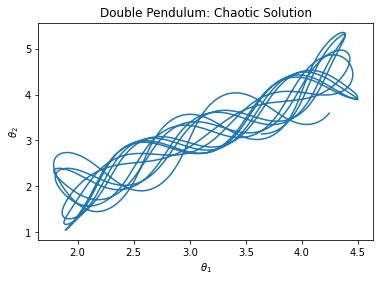

In [14]:
# 10.4: A Double Pendulum.
# Show that this system is sensitive to initial conditions - implying chaos.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from math import fmod
# Set the parameters.
# When L1=1.5 and L2=1.5, the system is quasiperiodic  - not sensitive to initial conditions
# g , m1 , m2 , L1 , L2 = 9.8 , 1 , 1 , 1.5 , 1.5
# When L1=6 and L2=1, the system is chaotic - sensitive to initial conditions. 
g , m1 , m2 , L1 , L2 = 9.8 , 1 , 1 , 6 , 1
x10 , y10 , x20 , y20 = 0.5 , 1.5 , 0 , 0
tmax, n = 35, 10000
# Let x1=theta1 and x2=theta2.
def Double_Pendulum(X, t, g, m1, m2, L1, L2):
    x1, y1, x2, y2 = X
    dx1 = y1
    dy1 = (-g*(2*m1+m2)*np.sin(x1)-m2*g*np.sin(x1-2*x2)-2*np.sin(x1-x2)*m2*(y2**2*L2+y1**2*L1*np.cos(x1-x2)))/(L1*(2*m1+m2-m2*np.cos(2*x1-2*x2)))
    dx2 = y2
    dy2 = (2*np.sin(x1-x2)*(y1**2*L1*(m1+m2)+g*(m1+m2)*np.cos(x1)+y2**2*L2*m2*np.cos(x1-x2)))/(L2*(2*m1+m2-m2*np.cos(2*x1-2*x2)))
    return(dx1, dy1, dx2 , dy2)
t = np.linspace(0, tmax, n)
odesol = odeint(Double_Pendulum, (x10, y10, x20 , y20), t, args = (g,m1,m2,L1,L2) , rtol=1e-6)
x1 , y1 , x2 , y2 = odesol.T
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.title("Double Pendulum: Chaotic Solution")
plt.plot((x1-np.pi) % (2*np.pi) , (x2-np.pi) % (2*np.pi))
plt.show()

# Chapter 11: Fractals and Multifractals

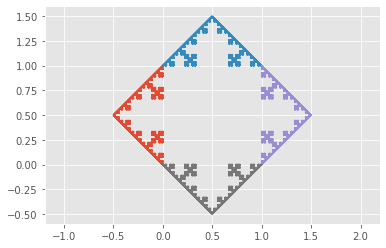

In [ ]:
# 11.1: Koch Square Fractal.
# Use the sum of an infinite geometric series to show Area-> 2 units squared.
import numpy as np
import matplotlib.pyplot as plt
from math import floor
def Koch_Square(k , angsquare , xstart , ystart):
  n_lines , h = 5**k , 3**(-k)
  x, y, x[0],y[0] = [0]*(n_lines+1),[0]*(n_lines+1) , xstart , ystart                  
  segment=[0] * n_lines      
  angle=[0, np.pi/2, 0 , -np.pi/2, 0]  
  for i in range(n_lines):
    m , ang = i , angsquare
    for j in range(k):
      segment[j] = np.mod(m, 5)
      m = floor(m / 5)
      ang = ang + angle[segment[j]]
    x[i+1] = x[i]+h*np.cos(ang)
    y[i+1] = y[i]+h*np.sin(ang)
  plt.axis("equal")
  plt.plot(x,y)
k = 6 
# Plot the four sides.
Koch_Square(k , np.pi/2 , 0 , 0)
Koch_Square(k , 0 , 0 , 1)
Koch_Square(k , -np.pi/2 , 1 , 1)
Koch_Square(k , -np.pi , 1 , 0)
plt.show()

The fractal dimension is  1.7807432234473481


<Figure size 432x288 with 0 Axes>

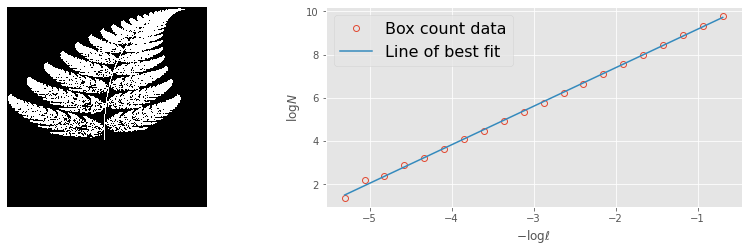

In [ ]:
# 11.2: Boxcount the fractal fern to get the fractal dimension.
# In the left column of Google Colab, drag Fern.png into the Files folder. 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io 
import pylab as pl
Fern_img = io.imread('Fern.png')
width, height, _ = Fern_img.shape
binary = np.zeros((width, height))
for i, row in enumerate(Fern_img):
    for j, pixel in enumerate(row):
        if pixel[0] < 220:
            binary[i, j] = 1
        else:
            binary[i, j] = 0
# Centre image.
img = binary[70:440,100:560]
width, height = img.shape
# Pad the image.
maxD=max(width,height)
Dim=int(2**np.ceil(np.log2(maxD)))
PadRow = int(Dim-width)
PadCol=int(Dim-height)
image=np.pad(img,[(0,PadRow),(0,PadCol)],mode="constant")
fig=plt.figure()
plt.subplots(figsize=(12, 6))
plt.subplot(221)
plt.axis("off")
io.imshow(image)
pixels=[]
for i in range(Dim):
	for j in range(Dim):
		if image[i,j] ==1:  
			pixels.append((i,j))    
pixels=pl.array(pixels)   
# Boxcount.
scales=np.logspace(1, 8, num=20, endpoint=False, base=2)
Ns=[]
for scale in scales:
    H, edges=np.histogramdd(pixels,bins=(np.arange(0,Dim,scale),\
                            np.arange(0,Dim,scale)))
    Ns.append(np.sum(H > 0))
# Polyfit to a straight line.
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
D = -coeffs[0]  # The fractal dimension.
fig=plt.subplot(222)
plt.rcParams["font.size"] = "16"
print("The fractal dimension is ", D )
plt.plot(-np.log(scales),np.log(Ns), "o", mfc="none", \
         label="Box count data")
plt.plot(-np.log(scales), np.polyval(coeffs,np.log(scales)),\
         label="Line of best fit")
plt.xlabel("$-\log \ell$")
plt.ylabel("$\log N$")
plt.legend()
plt.show()

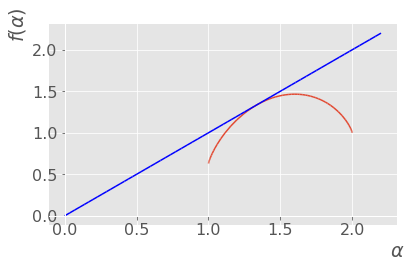

In [ ]:
# 11.3: Koch square multifractal spectra.
from sympy import symbols, log, diff, plot
import matplotlib.pyplot as plt
from sympy.plotting import plot_parametric
plt.rcParams["font.size"] = "16"
p1 , p2 , p1 , p2 , p1 = 1 / 9 , 1 / 3 , 1 / 9 , 1 / 3 , 1 / 9
q , x = symbols("q x")
tau = log(p1**q + p2**q + p1**q + p2**q + p1**q) / log(3)
alpha=-diff(tau , q)
f = alpha * q + tau
x = q
p1=plot_parametric(alpha , f ,  (q, -10, 10),xlabel=r'$\alpha$',
                   ylabel=r"$f(\alpha)$",show=False)
p2=plot(x, q, (x, 0, 2.2),line_color="b",show=False)
p1.append(p2[0])
p1.show()

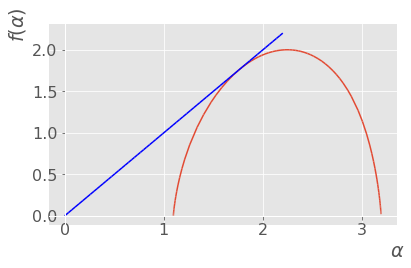

In [ ]:
# 11.4: Multifractal spectra for a 3x3 motif array multifractal.
from sympy import symbols, log, diff, plot
import matplotlib.pyplot as plt
from sympy.plotting import plot_parametric
plt.rcParams["font.size"] = "16"
p1,p2,p3,p4,p5,p6,p7,p8,p9 = 0.05,0.1,0.2,0.04,0.3,0.03,0.15,0.06,0.07
q , x = symbols("q x")
tau=log(p1**q+p2**q+p3**q+p4**q+p5**q+p6**q+p7**q+p8**q+p9**q)/log(3)
alpha=-diff(tau , q)
f = alpha * q + tau
x = q
p1=plot_parametric(alpha , f ,  (q, -20, 20),xlabel=r'$\alpha$',
                   ylabel=r"$f(\alpha)$",show=False)
p2=plot(x, q, (x, 0, 2.2),line_color="b",show=False)
p1.append(p2[0])
p1.show()

# Chapter 12: Image Processing

Important: If you wish to use the plots interactively, use Spyder. In the Console window type:

In[n]: matplotlib qt5

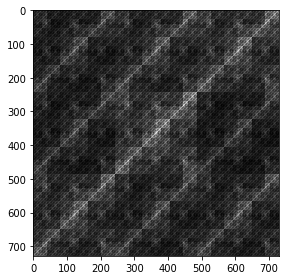

In [ ]:
# 12.1: Generate a multifractal image from a 3x3 array motif.
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, io, img_as_ubyte
p1,p2,p3,p4,p5,p6,p7,p8,p9=0.05,0.1,0.2,0.04,0.3,0.03,0.15,0.06,0.07
p = [[p1,p2,p3] , [p4,p5,p6] , [p7,p8,p9]]
for k in range(1, 6, 1):
  M = np.zeros([3 ** (k + 1), 3 ** (k + 1)])
  M.tolist()
  for i in range(3**k):
    for j in range(3**k):
      M[i][j] = p1 * p[i][j]
      M[i][j + 3**k] = p2 * p[i][j]
      M[i][j + 2 * 3**k] = p3 * p[i][j]
      M[i + 3**k][j] = p4 * p[i][j]
      M[i + 3**k][j] = p4 * p[i][j]
      M[i + 3**k][j + 3**k] = p5 * p[i][j]
      M[i + 3**k][j + 2 * 3**k] = p6 * p[i][j]
      M[i + 2 * 3**k][j] = p7 * p[i][j]
      M[i + 2 * 3**k][j + 3**k] = p8 * p[i][j]
      M[i + 2 * 3**k][j + 2 * 3**k] = p9 * p[i][j]
  p = M
M = exposure.adjust_gamma(M, 0.2)             # Change the contrast.
plt.imshow(M, cmap="gray", interpolation="nearest")
im = np.array(M, dtype="float64")
im = exposure.rescale_intensity(im, out_range="float")
im = img_as_ubyte(im)
# Save the image as a portable network graphics (png) image.
io.imsave("Multifractal.png", im)
io.imshow(im)

Image Dimensions= (700, 700, 3)
There are 77,498 yellow pixels


<Figure size 432x288 with 0 Axes>

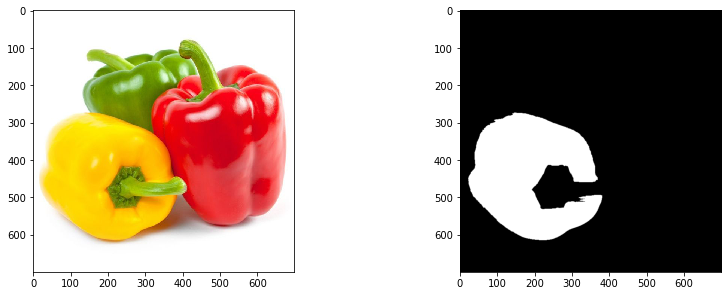

In [ ]:
# 12.2: Counting yellow pixels in an image.
# Load peppers.jpeg into the Google Colab folder on the left.
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
peppers = io.imread("peppers.jpeg")
plt.figure()
plt.subplots(figsize=(12, 8))
plt.subplot(221)
io.imshow(peppers)
print("Image Dimensions=" , peppers.shape)
Yellow = np.zeros((700,700))
for i in range(700):
    for j in range(700):
        if peppers[j,i,0]>230 and peppers[j,i,1]>130 \
            and peppers[j,i,2]<145:
            Yellow[j,i]=int(1)
        else:
            Yellow[j,i]=int(0)
plt.subplot(222)
# The array has to be Boolean.
Yellow = Yellow.astype(bool)
# Remove objects with area less than 20000 pixels.
Yellow = morphology.remove_small_objects(Yellow, 20000)
plt.imshow(Yellow , cmap="gray")
pixel_count = int(np.sum(Yellow))
print("There are {:,} yellow pixels".format(pixel_count))

/var/folders/qy/0rsc2gxn3h3ggfk3jr4nclk8zr335h/T/ipykernel_62432/570938965.py:13: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
/var/folders/qy/0rsc2gxn3h3ggfk3jr4nclk8zr335h/T/ipykernel_62432/570938965.py:14: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_gray = rgb2gray(vessels)


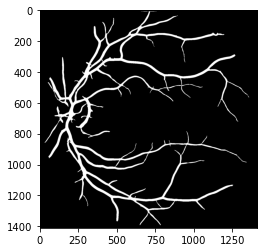

The vascular architecture is 14234 pixels long.


In [4]:
# 12.3: Length of vascular architecture.
# See Figure 11.4 and use the skeletonize function.
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import color, data, filters
from skimage import morphology
from skimage.morphology import skeletonize
retina_source = data.retina()
retina = color.rgb2gray(retina_source)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
img_gray = rgb2gray(vessels)
t = 0.015
binary_mask = img_gray > t
binary_mask = morphology.remove_small_objects(binary_mask, 2000)
plt.imshow(binary_mask , cmap = "gray")
plt.show()
skeleton=skeletonize(binary_mask)
# plt.imshow(skeleton, cmap="gray").  # Too thin to see here.
pixel_count = int(np.sum(skeleton))
print("The vascular architecture is",pixel_count, "pixels long.")

Image Dimensions= (1090, 1292)


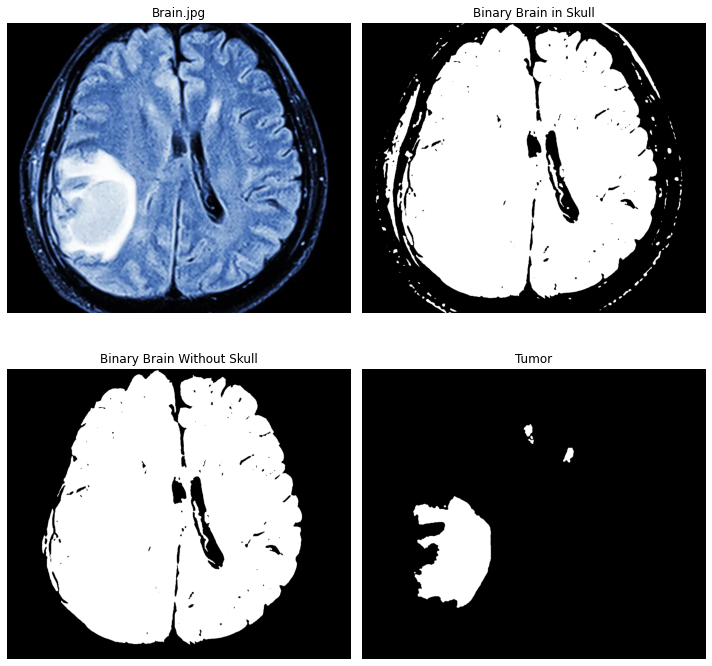

Area of Brain = 731393 pixels.
Area of Tumor = 82457 pixels.
Percentage of brain that is tumor =  11.273966253436935


In [ ]:
# 12.4: Determining percentage area of a tumor.
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
import matplotlib.image as img
from skimage.color import rgb2gray
# from skimage.filters import try_all_threshold 

img =img.imread("Brain.jpg")
Brain_gray = rgb2gray(img)
print("Image Dimensions=" , Brain_gray.shape)
Binary_skull = np.zeros((Brain_gray.shape[0],Brain_gray.shape[1]))
for i in range(Brain_gray.shape[1]):
    for j in range(Brain_gray.shape[0]):
        if Brain_gray[j,i]>0.3:
            Binary_skull[j,i]=1
        else:
            Binary_skull[j,i]=0
Binary_brain = Binary_skull.astype(bool)
Binary_brain = morphology.remove_small_objects(Binary_brain, 20000)
Binary_brain = Binary_brain.astype(np.uint8) 

# Apply different threshold filters.
# fig, ax = try_all_threshold(Brain_gray, figsize=(10, 8), verbose=False)
# plt.show()

# Compute a mask
mask = morphology.remove_small_holes(morphology.remove_small_objects(Brain_gray > 0.82 , 500) , 500)
mask = morphology.opening(mask, morphology.disk(3))
mask = mask.astype(np.uint8) 

# Display results.
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()
ax1.imshow(img)
ax1.set_title("Brain.jpg")
ax2.imshow(Binary_skull, cmap="gray")
ax2.set_title("Binary Brain in Skull")
ax3.imshow(Binary_brain , cmap="gray")
ax3.set_title("Binary Brain Without Skull")
ax4.imshow(mask , cmap="gray")
ax4.set_title("Tumor")
for ax in ax_arr.ravel():
  ax.set_axis_off()
plt.tight_layout()
plt.show()
print("Area of Brain =", int(np.sum(Binary_brain)) , "pixels.")
print("Area of Tumor =", int(np.sum(mask)) , "pixels.")
print("Percentage of brain that is tumor = " ,  100 * int(np.sum(mask)) / int(np.sum(Binary_brain)))

# Chapter 13: Numerical Methods for ODEs and PDEs

Exercises 13.1 and 13.2: Use the implicit Euler method (Exercise 13.1) and the two-step Adams-Bashforth method (Exercise 13.2) to solve the initial value problem:

$$\frac{dy}{dx}=(x-3.2)y+8x\exp\left(\frac{(x-3.2)^2}{2} \right)\cos(4x^2),$$

given that $x_0=0, y_0=1, h=0.1$ and $0 \leq x \leq 5$.

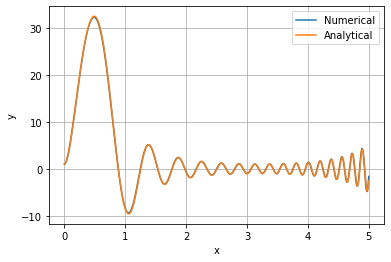

In [ ]:
# 13.1: Implicit Backward Euler Method.
import numpy as np
import matplotlib.pyplot as plt
def f(t,y):
    return (t-3.2)*y + 8*t*np.exp((t-3.2)**2/2)*np.cos(4*t**2)
def dfy(t,y):
    return t-3.2
t0 , y0 , tn , n = 0 , 1 , 5 , 500 
h = 0.01
t = np.linspace(0 , tn , n+1)
y = np.zeros(n+1)
y[0] = y0
for k in range(0 , n):
    err = 1
    yold = y[k] + h*f(t[k] , y[k])
    I = 0
    # Use Newton-Rapshon to find roots.
    while err > 10**(-10) and I < 5: 
            F  = y[k] + h*f(t[k+1] , yold) - yold
            dF = h*dfy(t[k+1] , yold) - 1
            ynew = yold - F/dF
            err = abs(ynew - yold)
            yold = ynew
            I += 1
            y[k+1] = ynew
plt.figure()
plt.plot(t , y , label = "Numerical")
C=y0*np.exp(-(t0-3.2)**2/2)-np.sin(4*t0**2)
ysol=np.exp((t-3.2)**2/2)*(np.sin(4*t**2) + C)
plt.plot(t , ysol , label = "Analytical")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

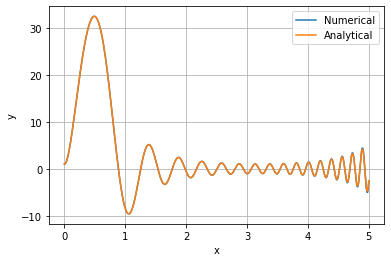

In [ ]:
# 13.2: Adams-Bashforth Two-Step Method.
import numpy as np
import matplotlib.pyplot as plt
def f(t,y):
    return (t-3.2)*y + 8*t*np.exp((t-3.2)**2/2)*np.cos(4*t**2)
#Use a one-step Runge-Kutta to compute first iterates.
def RK4(t0,tn,n,y0):
    h = abs(tn-t0)/n
    t = np.linspace(t0,tn,n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(0,n):
        K1 = f(t[i],y[i])
        K2 = f(t[i]+h/2,y[i]+K1*h/2)
        K3 = f(t[i]+h/2,y[i]+K2*h/2)
        K4 = f(t[i]+h,y[i]+K3*h)
        y[i+1] = y[i] + h*(K1+2*K2+2*K3+K4)/6
    return y
t0, y0, tn , n = 0 , 1 , 5 , 500
h = abs(tn-t0)/n
t = np.linspace(t0,tn,n+1)
y = np.zeros(n+1)
y[0:3] = RK4(t0,t0+2*h,2,y0)
K1 = f(t[1],y[1])
K2 = f(t[0],y[0])
# The two-step Adams-Bashforth Method.
for i in range(2,n):
    K2 = K1
    K1 = f(t[i],y[i])
    y[i+1] = y[i] + h * (3 * K1 - K2)/2
plt.figure()
plt.plot(t , y , label = "Numerical")
C=y0*np.exp(-(t0-3.2)**2/2)-np.sin(4*t0**2)
ysol=np.exp((t-3.2)**2/2)*(np.sin(4*t**2) + C)
plt.plot(t , ysol , label = "Analytical")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

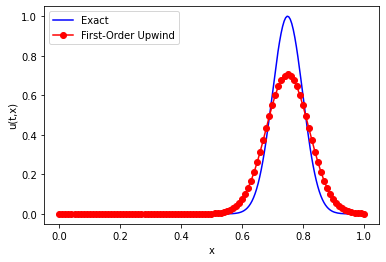

In [ ]:
# 13.3: Advection.
import numpy as np
import matplotlib.pyplot as plt

def exact(x, t):
    return np.exp(-200 * (x - v * t - 0.25) ** 2)
# Define parameters.
L, N, v, tmax = 1.0, 101, 0.5, 1
# Calculate initial conditions.
dx = L / (N - 1)
x = np.linspace(-dx, L + dx, N + 2)
U = exact(x, 0)
# Solver loop.
t = 0
# dt = 0.9 * dx / abs(v)
dt = 0.01
C = v * dt / dx

while t < tmax:
    # Calculate boundary conditions (zero gradient)
    U[0], U[-1] = U[2], U[-3]
    # Vectorized scheme.
    U[1:-1] -= C * (U[1:-1] - U[0:-2])
    t += dt
# Remove ghost nodes.
U, x = U[1:-1], x[1:-1]
# Plot solutions.
x1 = np.linspace(0, L, 200)
fig, ax = plt.subplots()
plt.plot(x1, exact(x1, tmax), "b-", label="Exact")
plt.plot(x, U, "ro-", label="First-Order Upwind")
plt.legend(loc = "upper left")
plt.xlabel("x")
plt.ylabel("u(t,x)")
plt.show()

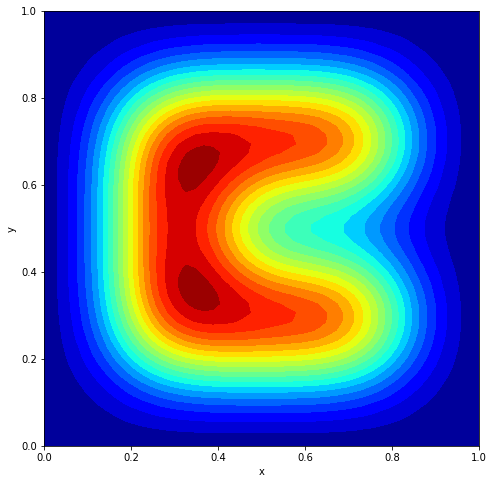

In [ ]:
# 13.4: Two-dimensional heat diffusion in a plate.
# Vectorized (and non-vectorized) code. 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx, Ly = 1, 1    # Length of the domain in the x and y direction.
nx, ny = 50, 50  # Number of nodes in the x and y direction.
alpha = 0.01     # Thermal diffusivity parameter.
tmax = 0.5       # Maximum time for solution.

# Define initial conditions (C-shape profile)
x, y, U = np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        if x[i] >= 0.2 and x[i] <= 0.8 and y[j] >= 0.2 and y[j] <= 0.4:
            U[i,j] = 1
        if x[i] >= 0.2 and x[i] <= 0.8 and y[j] >= 0.6 and y[j] <= 0.8:
            U[i,j] = 1
        if x[i] >= 0.2 and x[i] <= 0.4 and y[j] >= 0.4 and y[j] <= 0.6:
            U[i,j] = 1

# Solve 2D heat diffusion equation
dx, dy = Lx / nx,  Ly / ny                  # spatial step
dx2, dy2 = dx ** 2, dy ** 2                 # pre-calculate dx^2 and dy^2
dt = dx2 * dy2 / (2 * alpha * (dx2 + dy2))  # maximum allowable time step
t = 0                                       # time variable
while t < tmax:

    # Ensure that t does not exceed tmax
    dt = min(dt, tmax - t)

    # Loop through all nodes and calculate FTCS scheme
    Unew = np.copy(U)
    Unew[1:-1,1:-1] = U[1:-1,1:-1] + alpha * dt / dx2 * (U[:-2,1:-1] - \
                2 * U[1:-1,1:-1] + U[2:,1:-1]) \
   + alpha * dt / dy2 * (U[1:-1,:-2] - 2 * U[1:-1,1:-1] + U[1:-1,2:])

    # or using for loops
    # for i in range(1, nx - 1):
    #     for j in range(1, ny - 1):
    #         Unew[i,j] = U[i,j] + alpha * dt / dx2 * (U[i-1,j] - 2 * U[i,j] + U[i+1,j]) \
    #                     + alpha * dt / dy2 * (U[i,j-1] - 2 * U[i,j] + U[i,j+1])

    # Update U and t
    U = np.copy(Unew)
    t += dt

# Plot solution
fig, ax = plt.subplots(figsize=(8,8))
plt.contourf(x, y, U.T, levels=20, cmap="jet")
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect("equal")
plt.show()

# Chapter 14: Physics

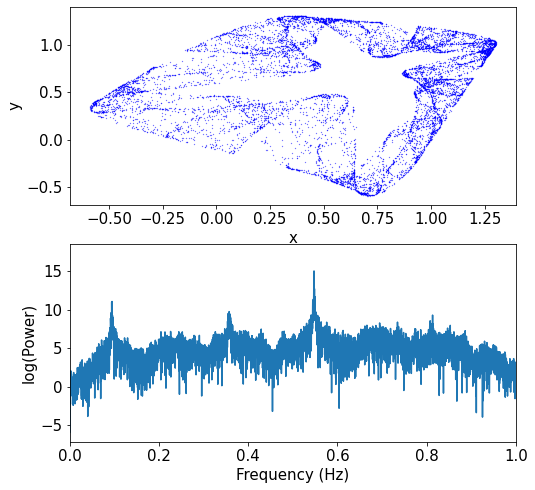

In [ ]:
# 14.1: Phase portraits and power spectra for a simple 2D map.
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import numpy as np
# Parameters
a, b = 1, 0.3  # Chaos.
# a , b = 1 , 0.12 # Quasiperiodic.
# a , b = 1 , 0.05 # Period 4.
n = 10000
def map_2d(X):
    x, y = X
    xn = 1 - a*y**2 + b*x
    yn = x
    return (xn, yn)
X0 = [(1 - b) / 2, (1 - b) / 2]
X, Y = [], []
for i in range(n):
    xn, yn = map_2d(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]
# Display results.
fig = plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(X, Y, color='blue', s=0.05)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
f = np.linspace(-1, 1, n)
power = np.abs(fft(X)**2)
power = np.log(power)
plt.subplot(212)
plt.plot(f , power)
plt.xlim(0, 1)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('log(Power)', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
# 14.2: Animation of the Ikeda map.
from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
fig=plt.figure() 
plt.title("Animation Ikeda Map")
plt.axis([0, 10, -2, 2])
B = 0.15
def ikeda(X):
    x, y = X
    xn = A + B*x*np.cos(x**2 + y**2) - B*y*np.sin(x**2 + y**2)
    yn = B*x*np.sin(x**2 + y**2) + B*y*np.cos(x**2 + y**2)
    return (xn, yn)
myimages = []
for A in np.arange(0.1, 8, 0.1):
    X0 = [A, 0]
    X, Y = [], []
    for i in range(5000):
        xn, yn = ikeda(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]         
    myimages.append(plt.plot(X, Y, 'b.', markersize=0.2))     
anim = ArtistAnimation(fig, myimages, blit=False, interval=100)
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())


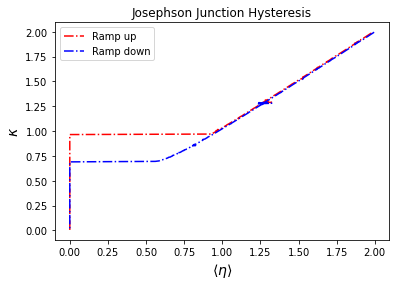

In [ ]:
# 14.3: Hysteresis in a tunnelling Josephson junction.
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 
kappa = "global"
a , b = 0 , 0
Max , mins , step, tmax = 400 , 120 , 0.005 , 160
interval = Max*step 
# JJ ODES.
def xdot(X,t):
  x , y = X[0] , X[1]
  dxdt , dydt = y , kappa - 0.6 * y - np.sin(x)
  return [dxdt , dydt] 
t = np.arange(0,tmax,1)
# Ramp kappa up
kappaup = []
for n in range(Max):
  X0 = [a,b]
  kappa = step*n
  sol = odeint(xdot,X0,t)
  s = len(sol[:,0])-1
  a , b = 0 , sol[s,1]
  kappaup.append(0.6*(max(sol[mins:s,1])+min(sol[mins:s,1]))/2) 
# ramp kappa down
kappadown = []
for n in range(Max):
  kappa = interval - step*n
  X0 = [a,b]
  sol = odeint(xdot,X0,t)
  s = len(sol[:,0])-1  
  a , b = 0 , max(sol[:,1])
  kappadown.append(0.6*(max(sol[mins:s,1])+min(sol[mins:s,1]))/2)
etas=np.arange(step,interval,step)
line_up = plt.plot(kappaup[0:399],etas,"r-.")
line_down = plt.plot(kappadown[0:399],interval-etas,"b-.")
plt.xlabel(r"$ \langle \eta \rangle$",fontsize=14) 
plt.ylabel(r"$\kappa$",fontsize=14) 
plt.title("Josephson Junction Hysteresis")
plt.legend([line_up[0], line_down[0]],["Ramp up", "Ramp down"]) 
plt.show()

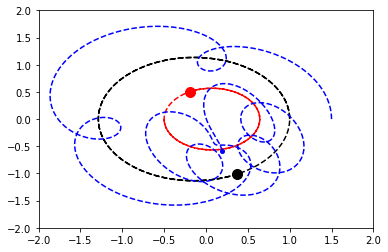

In [ ]:
# 14.4: The Restricted Three-Body Problem.
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
xmax = 2
m1,m2 = 1,2
def Planets(r1,r3,v1,v3):
    r2 = -m1 * r1 / m2
    r12 , r13 , r23 = norm(r1-r2),norm(r1-r3),norm(r2-r3)
    dr1 = v1
    dr3 = v3
    dv1 = (- m2**3 * r1) / ((m1+m2)**2 * (norm(r1))**3)
    dv3 = (- m1 * (r3-r1)) / r13**3 - m2 * (r3-r2) / r23**3
    return dr1 ,  dr3 , dv1 , dv3
n , dt = 1500000 , 0.00001
r1,r2,r3=np.zeros((n,2)),np.zeros((n,2)),np.zeros((n,2))
v1,v2,v3=np.zeros((n,2)),np.zeros((n,2)),np.zeros((n,2))
# The initial conditions.
r1[0],r3[0],v1[0],v3[0] = np.array([1,0]),np.array([1.5,0]),np.array([0,1]),np.array([0,2.5])
r2[0] = -m1 * r1[0] / m2
# Solve using Euler's numerical method. Use other numerical solvers for higher accuracy.
for i in range(n-1):
    dr1,dr3,dv1,dv3 = Planets(r1[i],r3[i],v1[i],v3[i])
    r1[i+1] = r1[i]+(dr1*dt)
    v1[i+1] = v1[i]+(dv1*dt)
    r3[i+1] = r3[i]+(dr3*dt)
    v3[i+1] = v3[i]+(dv3*dt)
    r2[i+1] = -m1 * r1[i] / m2
fig=plt.figure()
plt.xlim(-xmax,xmax)
plt.ylim(-xmax,xmax)
plt.plot(r1[:,0],r1[:,1],"k--")
plt.plot(r1[n-1,0],r1[n-1,1],'ko',markersize=10)
plt.plot(r2[:,0],r2[:,1],'r--')
plt.plot(r2[n-1,0],r2[n-1,1],'ro',markersize=10)
plt.plot(r3[:,0],r3[:,1],'b--')
plt.plot(r3[n-1,0],r3[n-1,1],'bo',markersize=4)
plt.show()

# Chapter 15: Statistics

Gradient:  [0.00010217]
y-Intercept: 
 17.62470611835826
MSE: 0.07
R2 Score: 0.85


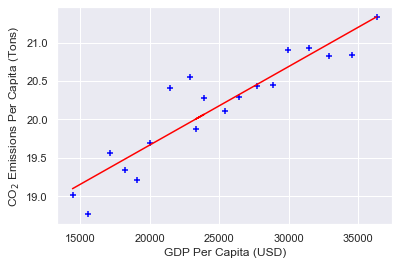

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              363.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    2.19e-13
Time:                        09:15:18   Log-Likelihood:                         -55.018
No. Observations:                  19   AIC:                                      112.0
Df Residuals:                      18   BIC:                                      113.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/99900361/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# 15.1: Simple Linear Regression.
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
data = pd.read_csv("CO2_GDP_USA_Data_1982_2000.csv")
data = data.dropna()
plt.rcParams["font.size"] = "20"
y = np.array(data['co2 per capita (metric tons)'])
x = np.array(data['gdp per capita (USD)']).reshape((-1, 1))
plt.scatter(x , y , marker = "+" , color = "blue")
plt.ylabel('CO$_2$ Emissions Per Capita (Tons)')
plt.xlabel('GDP Per Capita (USD)')
regr = linear_model.LinearRegression()
regr.fit(x , y)
y_pred = regr.predict(x)
print("Gradient: ", regr.coef_)
print("y-Intercept: \n", regr.intercept_)
print("MSE: %.2f"% mean_squared_error(y , y_pred))
print("R2 Score: %.2f" % r2_score(y , y_pred))
plt.plot(x , y_pred , color = "red")
plt.show()
sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())

[[0.1 0.1 0.8]]
[[0.31 0.29 0.41]]
[[0.42 0.36 0.23]]
[[0.49 0.38 0.14]]
[[0.53 0.38 0.1 ]]
[[0.56 0.37 0.08]]
[[0.58 0.36 0.07]]
[[0.59 0.35 0.07]]
[[0.6  0.34 0.07]]
[[0.61 0.33 0.07]]
[[0.62 0.33 0.07]]
[[0.62 0.33 0.07]]
Steady state after 11 iterations.


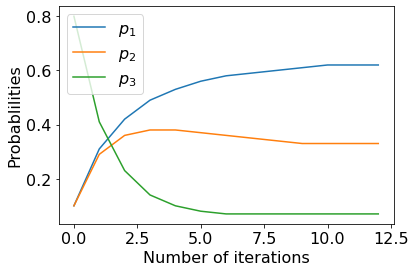

In [ ]:
# 15.2: Markov chain and the Bull Market.
import numpy as np
import matplotlib.pyplot as plt
T = np.array([[0.9,0.075,0.025], \
              [0.15,0.8,0.05], \
              [0.25,0.25,0.5]   
              ])
n = 20
v=np.array([[0.1, 0.1, 0.8]])
print(v)
vHist = v

for x in range(n):
  v = np.dot(v , T).round(2)
  vHist = np.append(vHist , v , axis = 0)
  if np.array_equal(vHist[x] , vHist[x-1]):
      print("Steady state after" , x , "iterations.")
      break
  print(v)
plt.rcParams["font.size"] = "16"
plt.xlabel("Number of iterations")
plt.ylabel("Probablilities")
plt.plot(vHist)
#plt.rcParams['linecolor']
plt.legend(["$p_1$","$p_2$","$p_3$"],loc="best")
plt.show()

In [ ]:
# 15.3: ANOVA - Analysis of variance test to compare variances across the means of
# different groups of data.
import scipy.stats as stats
Placebo = [83,90,50,75,112,49,139,60,101,81]
DrugA = [21,63,66,50,54,89,66,89,85,40]
DrugB = [52,26,77,56,44,89,104,41,89,41]
DrugC = [49,66,80,14,102,41,83,89,71,89]
DrugD = [13,69,22,38,55,42,84,44,43,31]

Output=stats.f_oneway(Placebo,DrugA,DrugB,DrugC,DrugD)
print(Output)

F_onewayResult(statistic=3.2950563126017025, pvalue=0.018834933828632862)


The F-statistic is 3.295, the $p$-value is $p=0.0188<0.05$, meaning there is statistically significant difference (so, we reject $H_0$, the null hypothesis). There is strong statistical evidence that the treatment has an effect on nitrous oxide levels, there is significant difference in mean concentrations due to drug treatments (we accept $H_1$). 

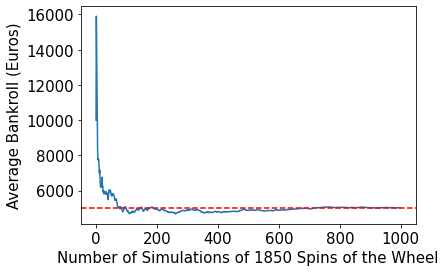

In [ ]:
# 15.4: Monte-Carlo Simulation. See Figure 14.6. 
import random
import matplotlib.pyplot as plt
final_balances = []
def spin():
   pocket = random.randint(1,37)
   return pocket
def roulette(bankroll, wager, spins):
    Num_Spins = []
    balance = []
# The first spin.
    num_spins = 1
# Set maximum number of spins.
    while num_spins < spins:
        # Payout if ball lands in even numbered pocket, but not zero.
        if (spin() % 2) == 0:
            # Add money to bankroll.
            bankroll = bankroll + wager
            # Increase number of spins.
            Num_Spins.append(num_spins)
            # Append the balance.
            balance.append(bankroll)
        # Gambler loses if ball lands in zero or odd numer. 
        else:
            # Subtract the money from the bankroll.
            bankroll = bankroll - wager 
            # Increase the number of spins.
            Num_Spins.append(num_spins)
            # Append the balance.
            balance.append(bankroll)          
        num_spins = num_spins + 1      
    #plt.plot(Num_Spins , balance)
    final_balances.append(balance[-1])
    return(final_balances)
i=1
vals , balance = [] , 10000
vals.append(balance)
for i in range(1,1000):
  balance += roulette(10000 , 100 , 1850)[-1] # Lose half bankroll.
  # end +=roulette(10000 , 100 , 3700)[-1] # Lose all bankroll.
  av = balance / i
  vals.append(av)
  # print(end)
plt.rcParams["font.size"] = "15"
plt.plot(vals)
plt.axhline(y=5000, color='r', linestyle='--')
plt.xlabel('Number of Simulations of 1850 Spins of the Wheel')
plt.ylabel('Average Bankroll (Euros)')
plt.show()

# End of Solutions 2